#Medical cost personal dataset regression

## get the dataset from kaggle


In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [2]:
!kaggle datasets download -d mirichoi0218/insurance

insurance.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile

zipdata = zipfile.ZipFile('insurance.zip')
zipdata.extractall()
zipdata.close()

## Data preprocessing

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

ct = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), ['sex','smoker','region']),
    (MinMaxScaler(), ['age','bmi','children'])
)

X = dataset.drop('charges',axis=1)
# or X = datset.iloc[:,:-1].values
y = dataset['charges']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

ct.fit(X_train)

X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [10]:
len(X_train), len(X_test)

(1070, 268)

In [11]:
len(y_train), len(y_test)

(1070, 268)

In [12]:
X_train[0]

array([ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        , -0.79403977,  0.38740727,
       -0.89871872])

## Train the model

In [25]:
import tensorflow as tf


model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer='adam',
              metrics=['mae'])

history = model.fit(X_train,
                    y_train,
                    epochs=50,
                    verbose=0)

In [26]:
model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3074.1240 - mae: 3074.1240


[3074.1240234375, 3074.1240234375]

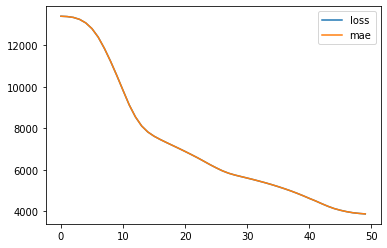

In [27]:
pd.DataFrame(history.history).plot()